In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cust=pd.read_csv("olist_customers_dataset.csv")

In [4]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
loc=pd.read_csv("olist_geolocation_dataset.csv")
loc.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


# customer data

In [6]:
loc_coordnts = loc[[
    'geolocation_zip_code_prefix',
    'geolocation_lat',
    'geolocation_lng'
]].groupby('geolocation_zip_code_prefix').mean().reset_index()

cols= [
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'geolocation_lat',
    'geolocation_lng'
]

customer_data = pd.merge(
    left= cust,
    right= loc_coordnts,
    left_on= 'customer_zip_code_prefix',
    right_on= 'geolocation_zip_code_prefix',
    how= 'left',
)[cols]

customer_data.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [7]:
customer_data=customer_data.drop_duplicates()

In [8]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


## Order data

In [9]:
orders=pd.read_csv("olist_orders_dataset.csv")
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [10]:
item_order=pd.read_csv("olist_order_items_dataset.csv")
item_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
cols=['order_id','customer_id','order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','product_id','seller_id','freight_value','order_item_id','price']
order_data=pd.merge(left=orders,
                    right=item_order,
                    on='order_id',
                    how='inner')[cols]
order_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,freight_value,order_item_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,1,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,22.76,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,27.20,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,8.72,1,19.90


In [12]:
order_data=order_data.drop_duplicates()

In [13]:
cols=["order_id","order_purchase_timestamp","product_id","freight_value","seller_id","order_item_id","price","customer_unique_id"]
cust_order=pd.merge(order_data,
                    customer_data,
                    on="customer_id",
                    how="inner")[cols]
cust_order.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6


In [14]:
products=pd.read_csv("olist_products_dataset.csv")

In [15]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
Product_name=pd.read_csv("product_category_name_translation.csv")
Product_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Product details

In [17]:
prod_details=pd.merge(products,
                      Product_name,
                      on="product_category_name",
                      how="inner")
prod_details.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [18]:
prod_details=prod_details.drop_duplicates()

In [19]:
prod_details.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [20]:
# customer order details

In [21]:
cust_order_details=pd.merge(cust_order,
                            prod_details,
                            on="product_id",
                            how="inner")
cust_order_details.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [22]:
cust_order_details=cust_order_details.drop_duplicates()

In [23]:
cust_order_details.isnull().sum()

order_id                         0
order_purchase_timestamp         0
product_id                       0
freight_value                    0
seller_id                        0
order_item_id                    0
price                            0
customer_unique_id               0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

##
Now let's find the seller data just like the customer data we find above

In [24]:
seller=pd.read_csv("olist_sellers_dataset.csv")
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Seller location data

In [25]:
loc_coordnts = loc[[
    'geolocation_zip_code_prefix',
    'geolocation_lat',
    'geolocation_lng'
]].groupby('geolocation_zip_code_prefix').mean().reset_index()

seller_data=pd.merge(left=seller,
                     right=loc_coordnts,
                     left_on="seller_zip_code_prefix",
                     right_on="geolocation_zip_code_prefix",
                     how="inner")
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914,-22.964803,-46.534419


In [26]:
seller_data=seller_data.drop_duplicates()

In [27]:
seller_data.isnull().sum()

seller_id                      0
seller_zip_code_prefix         0
seller_city                    0
seller_state                   0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [28]:
#  here we are done with the seller data now lets find the payment data

In [29]:
payment=pd.read_csv("olist_order_payments_dataset.csv")
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
order_payment=payment[["order_id","payment_installments","payment_value"]].groupby("order_id").sum().reset_index()
order_payment.head()

,order_id,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,3,259.83
2,000229ec398224ef6ca0657da4fc703e,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,3,218.04


# customer payment data

In [31]:
cust_payments=pd.merge(cust_order_details,
                       order_payment,
                       on="order_id",
                       how="inner")
cust_payments.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,1,28.62


In [32]:
cust_payments=cust_payments.drop_duplicates()

In [33]:
cust_payments.isnull().sum()

order_id                         0
order_purchase_timestamp         0
product_id                       0
freight_value                    0
seller_id                        0
order_item_id                    0
price                            0
customer_unique_id               0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
payment_installments             0
payment_value                    0
dtype: int64

 now lets merge order data and seller data to know which seller is assigned for the order

In [34]:
order_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,freight_value,order_item_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,1,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,22.76,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,27.20,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,8.72,1,19.90


lets join the order_data,seller_data and customer data to know that which is seller is assigned to which customer

In [35]:
cols=["customer_id","customer_unique_id","customer_zip_code_prefix","geolocation_lat","geolocation_lng","customer_city"]
seller_order=pd.merge(order_data,
                      customer_data[cols],
                      on="customer_id")
seller_order.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,freight_value,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,1,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,-23.576983,-46.587161,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,22.76,1,118.70,af07308b275d755c9edb36a90c618231,47813,-12.177924,-44.660711,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,-16.745150,-48.514783,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,27.20,1,45.00,7c142cf63193a1473d2e66489a9ae977,59296,-5.774190,-35.271143,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,8.72,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,-23.676370,-46.514627,santo andre


In [36]:
cols=["seller_id","seller_zip_code_prefix","geolocation_lat","geolocation_lng"]
seller_cust=pd.merge(seller_data[cols],
                     seller_order,
                     on="seller_id",
                     how="inner")
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,freight_value,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,f4621f8ad6f54a2e3c408884068be46d,15.92,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,325a06bcce0da45b7f4ecf2797dd40e4,2.42,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,ffb64e34a37740dafb6c88f1abd1fa61,9.56,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro


In [37]:
seller_cust.isnull().sum()

seller_id                           0
seller_zip_code_prefix              0
geolocation_lat_x                   0
geolocation_lng_x                   0
order_id                            0
customer_id                         0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1190
order_delivered_customer_date    2450
order_estimated_delivery_date       0
product_id                          0
freight_value                       0
order_item_id                       0
price                               0
customer_unique_id                  0
customer_zip_code_prefix            0
geolocation_lat_y                 301
geolocation_lng_y                 301
customer_city                       0
dtype: int64

In [38]:
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [39]:
cust_order_details.columns


Index(['order_id', 'order_purchase_timestamp', 'product_id', 'freight_value',
       'seller_id', 'order_item_id', 'price', 'customer_unique_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [40]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [41]:
cols=["product_id",'product_category_name_english','order_id','seller_id','customer_unique_id','review_id', 'review_score', 'review_comment_title',
       'review_comment_message']
cust_reviews=pd.merge(cust_order_details,
                     reviews,
                     on="order_id",
                     how="inner")[cols]
cust_reviews.head()

,product_id,product_category_name_english,order_id,seller_id,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message
0,87285b34884572647811a353c7ac498a,housewares,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,7c396fd4830fd04220f754e42b4e5bff,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre..."
1,595fac2a385ac33a80bd5114aec74eb8,perfumery,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,af07308b275d755c9edb36a90c618231,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.
2,aa4383b373c6aca5d8797843e5594415,auto,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,3a653a41f6f9fc3d2a113cf8398680e8,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN
3,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,7c142cf63193a1473d2e66489a9ae977,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...
4,65266b2da20d04dbe00c5c2d3bb7859e,stationery,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,72632f0f9dd73dfee390c9b22eb56dd6,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN


In [42]:
cust_reviews.columns

Index(['product_id', 'product_category_name_english', 'order_id', 'seller_id',
       'customer_unique_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message'],
      dtype='object')

In [43]:
mean_scores = cust_reviews.groupby('product_id')['review_score'].mean().reset_index()

In [44]:
mean_scores.head()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0


In [45]:
mean_scores.rename(columns={"review_score":"mean_review_score"},inplace=True)

# customer reviews on the basis of each product

In [46]:
final_cust_reviews=pd.merge(left=cust_reviews,
                            right=mean_scores,
                            on="product_id",
                            how='inner')
final_cust_reviews.head()

,product_id,product_category_name_english,order_id,seller_id,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,mean_review_score
0,87285b34884572647811a353c7ac498a,housewares,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,7c396fd4830fd04220f754e42b4e5bff,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",4.00000
1,595fac2a385ac33a80bd5114aec74eb8,perfumery,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,af07308b275d755c9edb36a90c618231,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,4.40566
2,aa4383b373c6aca5d8797843e5594415,auto,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,3a653a41f6f9fc3d2a113cf8398680e8,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,5.00000
3,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,7c142cf63193a1473d2e66489a9ae977,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,4.25000
4,65266b2da20d04dbe00c5c2d3bb7859e,stationery,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,72632f0f9dd73dfee390c9b22eb56dd6,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,3.72500


In [47]:
final_cust_reviews.isnull().sum()

product_id                           0
product_category_name_english        0
order_id                             0
seller_id                            0
customer_unique_id                   0
review_id                            0
review_score                         0
review_comment_title             97403
review_comment_message           63827
mean_review_score                    0
dtype: int64

## Let's gather all the final datasets here
1.customer_data,
2.cust_order_details,
3.prod_details,
4.seller_data,
5.cust_payments,
6.seller_cust,
7.final_cust_reviews

In [48]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [49]:
cust_order_details.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


## 
now lets do some priliminary analysis

In [50]:
print("the number of unique customers are ",len(customer_data.customer_unique_id.unique()))

the number of unique customers are  96096


In [51]:
cust_order_details["Total Price"]=cust_order_details["freight_value"]+cust_order_details["price"]

In [52]:
order_counts = cust_order_details.groupby('product_category_name_english')['order_id'].size()
order_counts

product_category_name_english
agro_industry_and_commerce     212
air_conditioning               297
art                            209
arts_and_craftmanship           24
audio                          364
                              ... 
stationery                    2517
tablets_printing_image          83
telephony                     4545
toys                          4117
watches_gifts                 5991
Name: order_id, Length: 71, dtype: int64

In [53]:
order_counts = cust_order_details.groupby('product_category_name_english')['order_id'].size().reset_index(name="Count")
order_counts

,product_category_name_english,Count
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


In [54]:
order_counts.columns

Index(['product_category_name_english', 'Count'], dtype='object')

In [55]:
cust_order_details.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Total Price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,28.62


In [56]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(100, 120))  # Increase figure size


ax0.barh(cust_order_details["product_category_name_english"],cust_order_details["Total Price"])
ax0.set(title="Total Price vs English name",
        xlabel="total cost",
        ylabel="Name of the product")

ax1.barh(order_counts["product_category_name_english"],order_counts["Count"])
ax1.set(title="Sale count vs name",
        xlabel="total sale",
        ylabel="name")


[Text(0.5, 1.0, 'Sale count vs name'),
 Text(0.5, 0, 'total sale'),
 Text(0, 0.5, 'name')]

In [57]:
order_sum_product = cust_order_details.groupby('product_category_name_english')['Total Price'].sum().reset_index(name="total sale")

In [58]:
order_sum_product

,product_category_name_english,total sale
0,agro_industry_and_commerce,78374.07
1,air_conditioning,61774.19
2,art,28247.81
3,arts_and_craftmanship,2184.14
4,audio,56398.94
...,...,...
66,stationery,277741.71
67,tablets_printing_image,8754.61
68,telephony,394883.32
69,toys,561372.55


## 
lets check the number of custoemrs in different state

In [59]:
state_cust_count = customer_data.groupby('customer_state')['customer_unique_id'].size().reset_index(name="cust_count")

In [60]:
state_cust_count.head()

,customer_state,cust_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


[Text(0.5, 1.0, 'customer count in state'),
 Text(0.5, 0, 'States'),
 Text(0, 0.5, 'customer_count')]

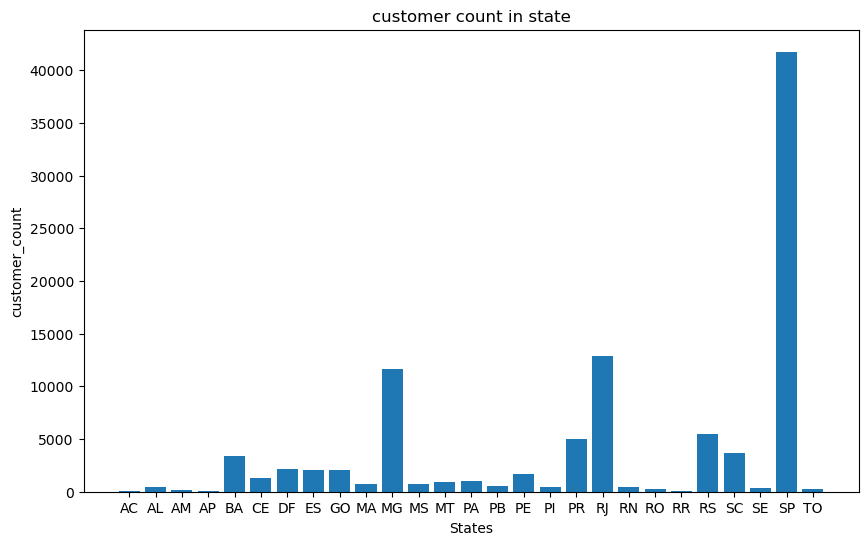

In [61]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(state_cust_count["customer_state"],state_cust_count["cust_count"])
ax.set(title="customer count in state",
      xlabel="States",
      ylabel="customer_count")

## 
here it shows that state SP have much more number of customers than other states

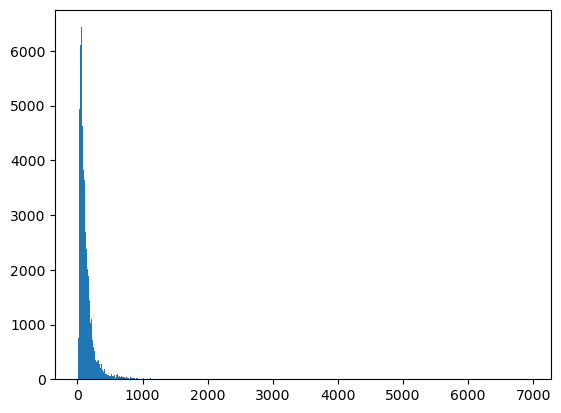

In [62]:
fig,ax=plt.subplots()
ax.hist(cust_order_details["Total Price"],bins=1000);

In [63]:
cust_payments.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,1,28.62


In [64]:
cust_paytype = payment.groupby('payment_type')['order_id'].size().reset_index(name="cust_count")
cust_paytype

,payment_type,cust_count
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


[Text(0.5, 1.0, 'payment type analysis'),
 Text(0.5, 0, 'payment type'),
 Text(0, 0.5, 'order count')]

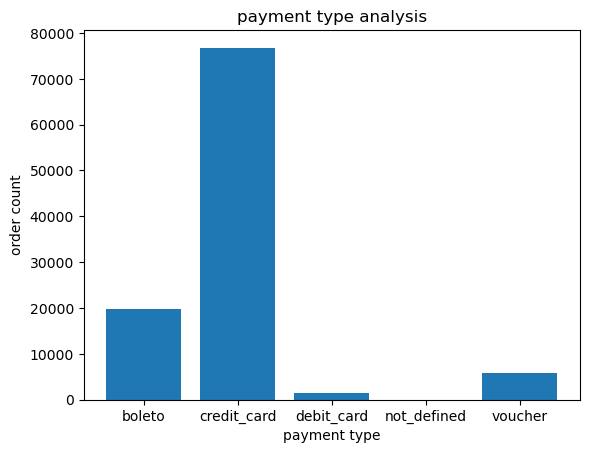

In [65]:
fig,ax=plt.subplots()
ax.bar(cust_paytype["payment_type"],cust_paytype["cust_count"])
ax.set(title="payment type analysis",
       xlabel="payment type",
       ylabel="order count")

In [66]:
cust_payments.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,1,28.62


In [67]:
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914,-22.964803,-46.534419


In [69]:
state_seller_count = seller_data.groupby('seller_state')['seller_id'].size().reset_index(name="seller_count")
state_seller_count.head()

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,28


[Text(0.5, 1.0, 'seller count in state'),
 Text(0.5, 0, 'States'),
 Text(0, 0.5, 'seller_count')]

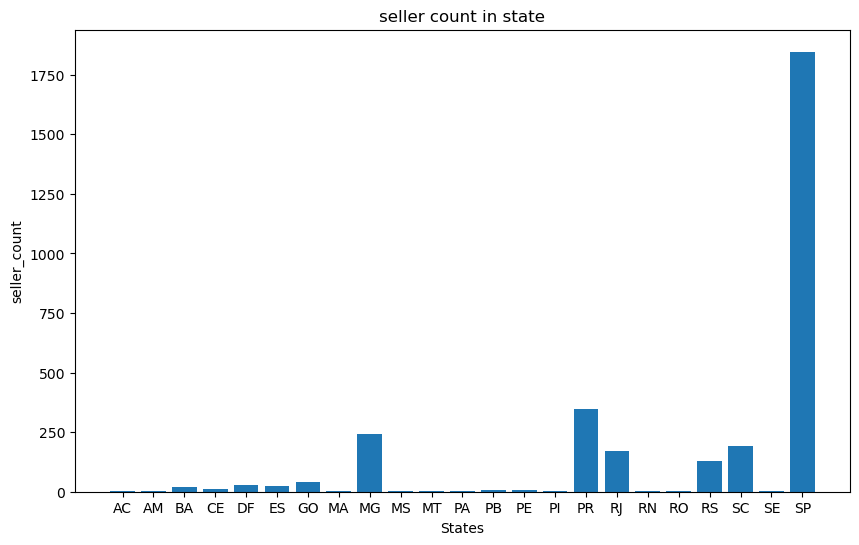

In [70]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(state_seller_count["seller_state"],state_seller_count["seller_count"])
ax.set(title="seller count in state",
      xlabel="States",
      ylabel="seller_count")

## 
so here we notice that sp have more customers and more sellers also, while RJ have more customers than PR but less sellers than PR

In [71]:
cust_order_details.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Total Price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,28.62


In [72]:
category_sum = cust_order_details.groupby('product_category_name_english')['Total Price'].sum().reset_index(name="total spending")
category_sum.head()

,product_category_name_english,total spending
0,agro_industry_and_commerce,78374.07
1,air_conditioning,61774.19
2,art,28247.81
3,arts_and_craftmanship,2184.14
4,audio,56398.94


In [73]:
fig,ax=plt.subplots(figsize=(100,120))
ax.barh(category_sum["product_category_name_english"],category_sum["total spending"])
ax.set(title="spending on different products",
       xlabel="total spending",
       ylabel="Products")

[Text(0.5, 1.0, 'spending on different products'),
 Text(0.5, 0, 'total spending'),
 Text(0, 0.5, 'Products')]

## Note
 so its clear from this graph that people spend more on health beuty, watches_gift,sports_leisure, bed_bath table, computer_accesories

In [74]:
description_role = cust_order_details.groupby('product_description_lenght')['Total Price'].sum().reset_index(name="total spending")
description_role

,product_description_lenght,total spending
0,4.0,1274.10
1,8.0,354.02
2,15.0,22.81
3,20.0,220.96
4,23.0,25.60
...,...,...
2955,3963.0,145.07
2956,3976.0,3193.57
2957,3985.0,90.44
2958,3988.0,285.16


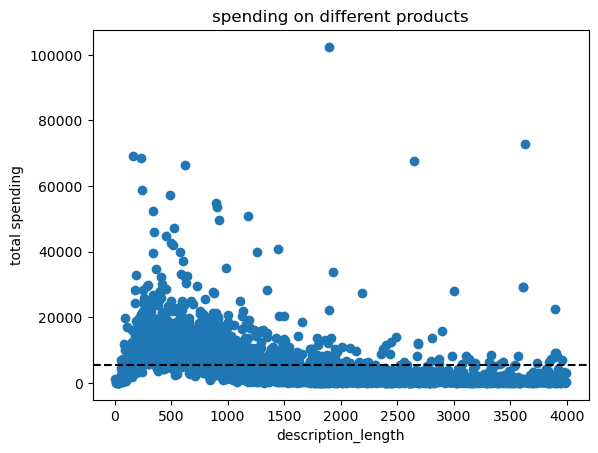

In [75]:
fig,ax=plt.subplots()
ax.scatter(description_role["product_description_lenght"],description_role["total spending"])
ax.set(title="spending on different products",
       xlabel="description_length",
       ylabel="total spending")
ax.axhline(description_role["total spending"].mean(),
           linestyle="--",
          color="black");

##
some of the outliers values are there but mostly we notice that the products whose description length is in between 150 to 500 words are the most 
selling products

In [76]:
photos_role = cust_order_details.groupby('product_photos_qty')['Total Price'].sum().reset_index(name="total spending")
photos_role

,product_photos_qty,total spending
0,1.0,7486842.12
1,2.0,2877890.80
2,3.0,1930757.26
3,4.0,1402856.59
4,5.0,840180.03
5,6.0,572331.03
6,7.0,270143.63
7,8.0,124278.58
8,9.0,47290.20
9,10.0,60579.95


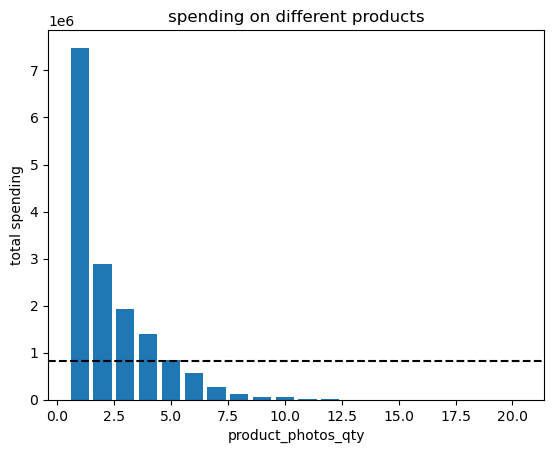

In [77]:
fig,ax=plt.subplots()
ax.bar(photos_role["product_photos_qty"],photos_role["total spending"])
ax.set(title="spending on different products",
       xlabel="product_photos_qty",
       ylabel="total spending")
ax.axhline(photos_role["total spending"].mean(),
           linestyle="--",
          color="black");

##
it shows that people spend more on the products which have photos between 1 to 4 images

lets make a graph to check that how freight value is affecting the sales

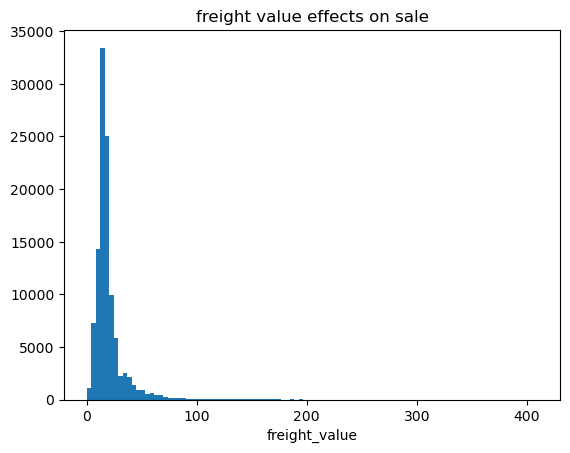

In [78]:
fig,ax=plt.subplots()
ax.hist(cust_order_details["freight_value"],bins=100)
ax.set(title="freight value effects on sale",
      xlabel="freight_value");

here it shows freight value directly affect the sales after some point on the graph the chart keep on falling showing freight 
value is inversely proportional to the sales.

In [79]:
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,freight_value,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,f4621f8ad6f54a2e3c408884068be46d,15.92,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,325a06bcce0da45b7f4ecf2797dd40e4,2.42,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,ffb64e34a37740dafb6c88f1abd1fa61,9.56,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro


In [80]:
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,freight_value,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,f4621f8ad6f54a2e3c408884068be46d,15.92,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,325a06bcce0da45b7f4ecf2797dd40e4,2.42,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,ffb64e34a37740dafb6c88f1abd1fa61,9.56,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro


In [81]:
final_cust_reviews.head()

,product_id,product_category_name_english,order_id,seller_id,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,mean_review_score
0,87285b34884572647811a353c7ac498a,housewares,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,7c396fd4830fd04220f754e42b4e5bff,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",4.00000
1,595fac2a385ac33a80bd5114aec74eb8,perfumery,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,af07308b275d755c9edb36a90c618231,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,4.40566
2,aa4383b373c6aca5d8797843e5594415,auto,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,3a653a41f6f9fc3d2a113cf8398680e8,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,5.00000
3,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,7c142cf63193a1473d2e66489a9ae977,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,4.25000
4,65266b2da20d04dbe00c5c2d3bb7859e,stationery,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,72632f0f9dd73dfee390c9b22eb56dd6,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,3.72500


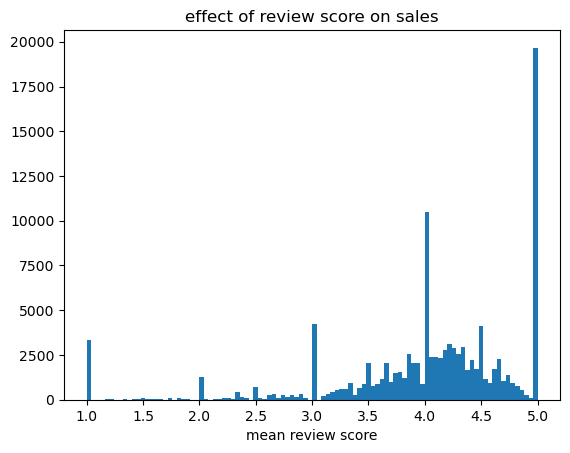

In [82]:
fig,ax=plt.subplots()
ax.hist(final_cust_reviews["mean_review_score"],bins=100)
ax.set(title="effect of review score on sales",
      xlabel="mean review score");

here it is showing that as the review score is increasing the sales frequency also increases

##
1.customer_data, 2.cust_order_details, 3.prod_details, 4.seller_data, 5.cust_payments, 6.seller_cust, 7.final_cust_reviews

In [83]:
prod_details.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [84]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [85]:
cust_order_details.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Total Price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,28.62


In [86]:
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,freight_value,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,f4621f8ad6f54a2e3c408884068be46d,15.92,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,325a06bcce0da45b7f4ecf2797dd40e4,2.42,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,ffb64e34a37740dafb6c88f1abd1fa61,9.56,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,765c417cdc38443aaa558a0159a98591,21.55,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro


In [87]:
seller_cust["order_delivered_customer_date"]=pd.to_datetime(seller_cust["order_delivered_customer_date"])
seller_cust["order_purchase_timestamp"]=pd.to_datetime(seller_cust["order_purchase_timestamp"])
seller_cust["delievery_time"]=seller_cust["order_delivered_customer_date"]-seller_cust["order_purchase_timestamp"]

In [88]:
seller_cust["order_estimated_delivery_date"]=pd.to_datetime(seller_cust["order_estimated_delivery_date"])
seller_cust["delivery_time_difference_expected"]=seller_cust["order_estimated_delivery_date"]-seller_cust["order_delivered_customer_date"]

In [89]:
seller_cust["delivery_time_expected"]=seller_cust["order_estimated_delivery_date"]-seller_cust["order_purchase_timestamp"]

In [90]:
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city,delievery_time,delivery_time_difference_expected,delivery_time_expected
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,...,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem,28 days 00:45:15,-4 days +07:02:16,24 days 07:47:31
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,...,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua,2 days 05:03:34,18 days 07:08:34,20 days 12:12:08
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,...,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo,8 days 19:31:29,1 days 07:52:47,10 days 03:24:16
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,...,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba,11 days 00:06:58,22 days 09:32:55,33 days 09:39:53
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,...,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro,7 days 04:10:23,32 days 10:39:53,39 days 14:50:16


In [91]:
seller_cust['delivery_time_expected']=seller_cust['delivery_time_expected'].dt.total_seconds()

In [92]:
seller_cust.head()

,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,order_item_id,price,customer_unique_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,customer_city,delievery_time,delivery_time_difference_expected,delivery_time_expected
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,...,1,101.7,b4527423469300ee354458e1b5f961be,32223,-19.962644,-44.037409,contagem,28 days 00:45:15,-4 days +07:02:16,2101651.0
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,...,2,10.8,af0f26435fade1ca984d9affda307199,9310,-23.670348,-46.451226,maua,2 days 05:03:34,18 days 07:08:34,1771928.0
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,...,1,106.2,f421a2a66b69dbfe6db0c87845281a90,4661,-23.674317,-46.684210,sao paulo,8 days 19:31:29,1 days 07:52:47,876256.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,2017-04-28 14:20:07,2017-04-28 14:35:15,2017-05-02 13:39:21,2017-05-09 14:27:05,...,1,209.9,00ac9cd5c4ad19e16e7c6f6864711737,37500,-22.420453,-45.453007,itajuba,11 days 00:06:58,22 days 09:32:55,2885993.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,2017-04-27 09:09:44,2017-04-27 09:25:08,2017-04-27 13:47:44,2017-05-04 13:20:07,...,1,209.9,51dc56123336c573f2977f5da81b17b9,20251,-22.922201,-43.200156,rio de janeiro,7 days 04:10:23,32 days 10:39:53,3423016.0


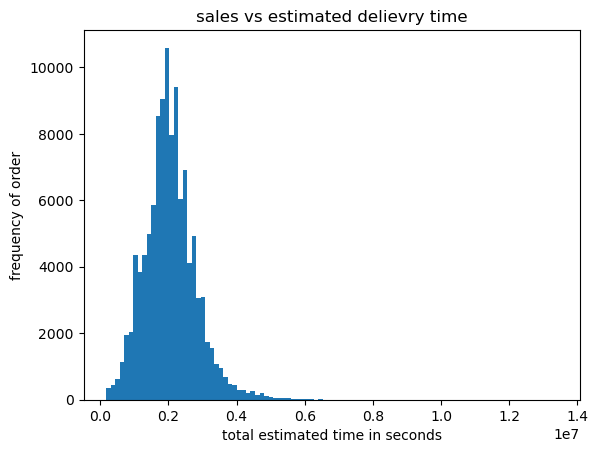

In [93]:
fig,ax=plt.subplots()
ax.hist(seller_cust['delivery_time_expected'],bins=100)
ax.set(title="sales vs estimated delievry time",
      xlabel="total estimated time in seconds",
      ylabel="frequency of order");

In [94]:
seller_cust["order_purchase_timestamp"].head()

0   2017-05-05 16:12:29
1   2017-08-30 11:47:52
2   2017-08-21 20:35:44
3   2017-04-28 14:20:07
4   2017-04-27 09:09:44
Name: order_purchase_timestamp, dtype: datetime64[ns]

##
Let's check during which time the orders are more

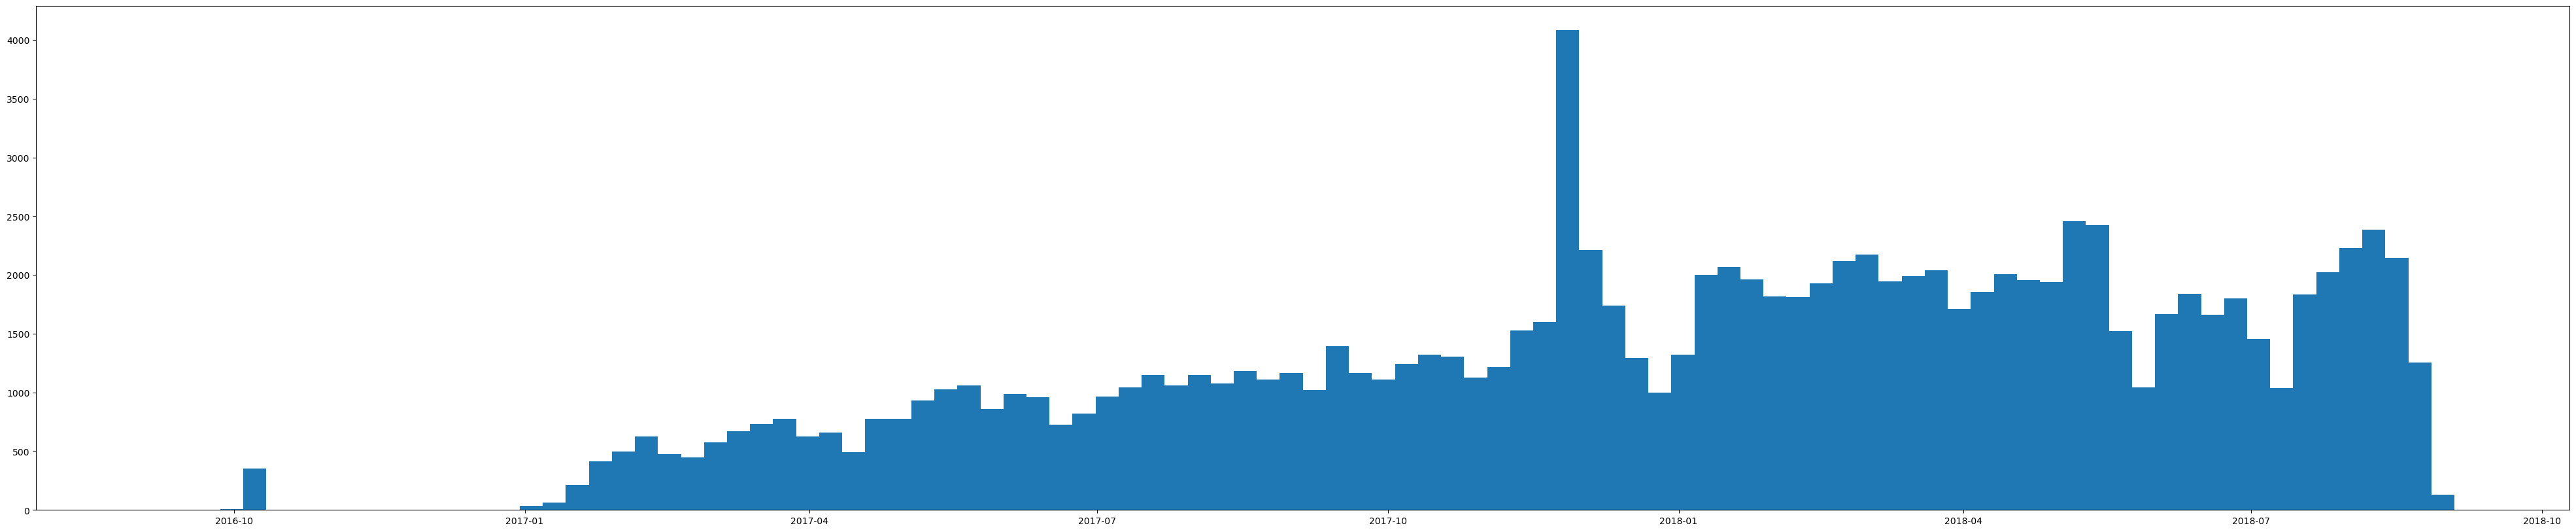

In [95]:
fig,ax=plt.subplots(figsize=(50,10))
ax.hist(seller_cust["order_purchase_timestamp"],bins=100);


## 
so not a specific trend is seen here the sales are increasing except for some outliers.

In [96]:
cust_payments.head()

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,7c396fd4830fd04220f754e42b4e5bff,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,22.76,289cdb325fb7e7f891c38608bf9e0962,1,118.70,af07308b275d755c9edb36a90c618231,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,3a653a41f6f9fc3d2a113cf8398680e8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,27.20,66922902710d126a0e7d26b0e3805106,1,45.00,7c142cf63193a1473d2e66489a9ae977,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,8.72,2c9e548be18521d1c43cde1c582c6de8,1,19.90,72632f0f9dd73dfee390c9b22eb56dd6,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,1,28.62


In [97]:
cust_payments["order_purchase_timestamp"]=pd.to_datetime(seller_cust["order_purchase_timestamp"])

In [98]:
cust_payments["Month"]=cust_payments["order_purchase_timestamp"].dt.month

In [99]:
cust_payments["Year"]=cust_payments["order_purchase_timestamp"].dt.year

In [100]:
cust_payments = cust_payments.sort_values(by=['Year', 'Month'])

In [101]:
cust_payments

,order_id,order_purchase_timestamp,product_id,freight_value,seller_id,order_item_id,price,customer_unique_id,product_category_name,product_name_lenght,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value,Month,Year
20740,0b0809b2b64511c62fb745fb8b465cc9,2016-09-04 21:15:19,cc5c6bf704a4b642e8964b5b2dcdb0da,12.90,ab27bbbad5239bc31a34709275a70db4,4,33.90,47368842f3611a911ad776b043394ea1,ferramentas_jardim,42.0,...,2.0,200.0,30.0,4.0,30.0,garden_tools,10,280.80,9,2016
20741,0b0809b2b64511c62fb745fb8b465cc9,2016-09-04 21:15:19,cc5c6bf704a4b642e8964b5b2dcdb0da,12.90,ab27bbbad5239bc31a34709275a70db4,5,33.90,47368842f3611a911ad776b043394ea1,ferramentas_jardim,42.0,...,2.0,200.0,30.0,4.0,30.0,garden_tools,10,280.80,9,2016
62404,dae7f9d0e25515e268456f392f53751e,2016-09-15 12:16:38,b532349fe46b38fbc7bb3914c1bdae07,9.00,1025f0e2d44d7041d6cf58b6550e0bfa,2,35.00,e4ccba2bd3c63fd05d8db68df49391f5,moveis_decoracao,49.0,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,1,88.00,9,2016
62405,8c0c24dbbcc3943b962f8833a34fc82b,2016-09-15 12:16:38,3225c54bb2785c33f49f50398fcdb88c,19.80,4869f7a5dfa277a7dca6462dcf3b52b2,1,274.90,27fdc7e88309799b55298d3be5ae1ccc,relogios_presentes,47.0,...,1.0,269.0,17.0,11.0,13.0,watches_gifts,8,294.70,9,2016
62406,5c3f34d1746b84450b26112f62f6419b,2016-09-15 12:16:38,a62e25e09e05e6faf31d90c6ec1aa3d1,19.70,634964b17796e64304cadf1ad3050fb7,1,105.00,b7854c9bdaa0d9650bf2cf9a89399f8a,relogios_presentes,58.0,...,2.0,1000.0,53.0,8.0,18.0,watches_gifts,2,124.70,9,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110952,a6bd1f93b7ff72cc348ca07f38ec4bee,2018-08-13 20:33:57,c045b19fdb30a3035c56d04c6fe2e622,17.33,259f7b5e6e482c230e5bfaa670b6bb8f,1,59.90,9108b540419f20edc605468f3966813b,cama_mesa_banho,48.0,...,3.0,2050.0,50.0,10.0,40.0,bed_bath_table,3,77.23,8,2018
110953,ecb8849b9673c0bc2a510456938b508b,2018-08-07 14:27:32,460a66fcc404a3d7306d5f50fcb2d18a,12.84,ffc470761de7d0232558ba5e786e57b7,1,24.98,2ba34389582f8a27e6e9bdde979cb2ef,utilidades_domesticas,51.0,...,1.0,350.0,16.0,16.0,17.0,housewares,1,37.82,8,2018
110964,83db27f85506380229913b0dfdf5cd18,2018-08-08 17:36:33,86f2416d4670e4ea3ca5494d043d9f24,49.15,7c67e1448b00f6e969d365cea6b010ab,1,149.94,35a382f91046bec8ef1acb7dc62b7318,moveis_escritorio,33.0,...,1.0,11700.0,36.0,54.0,35.0,office_furniture,1,398.18,8,2018
111007,c81f74e50f0496fa39716cc77cacd460,2018-08-20 13:28:21,cb92637d91f8267856d2143b6fc7bd9e,15.83,376a891762bbdecbc02b4b6adec3fdda,1,55.00,324a22205906aa2612a33e63c00ca8bb,esporte_lazer,49.0,...,4.0,250.0,22.0,14.0,11.0,sports_leisure,2,70.83,8,2018


In [102]:
Revenue_by_month = cust_payments.groupby(['Month','Year'])['payment_value'].size().reset_index(name="revenue")

In [103]:
Revenue_by_month

,Month,Year,revenue
0,1,2017,944
1,1,2018,8103
2,2,2017,1928
3,2,2018,7628
4,3,2017,2948
5,3,2018,8128
6,4,2017,2636
7,4,2018,7874
8,5,2017,4090
9,5,2018,7777


In [104]:
Revenue_by_month = Revenue_by_month.sort_values(by=['Year','Month'])
Revenue_by_month

,Month,Year,revenue
16,9,2016,6
19,10,2016,361
22,12,2016,1
0,1,2017,944
2,2,2017,1928
4,3,2017,2948
6,4,2017,2636
8,5,2017,4090
10,6,2017,3512
12,7,2017,4461


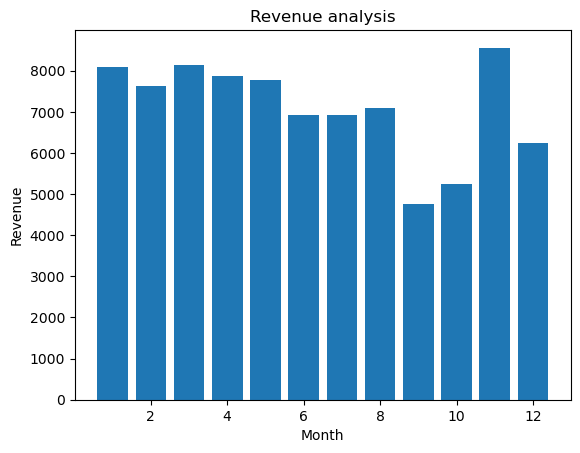

In [105]:
fig,ax=plt.subplots()
ax.bar(Revenue_by_month["Month"],Revenue_by_month["revenue"])
ax.set(title="Revenue analysis",
      xlabel="Month",
      ylabel="Revenue");

##
here it does not give any clear indication about the revenue trends so lets check it on year basis then I think we can conclude something.

In [106]:
Revenue_sum_by_year=Revenue_by_month.groupby('Year')['revenue'].sum().reset_index(name="Revenue")
Revenue_sum_by_year

,Year,Revenue
0,2016,368
1,2017,50189
2,2018,60463


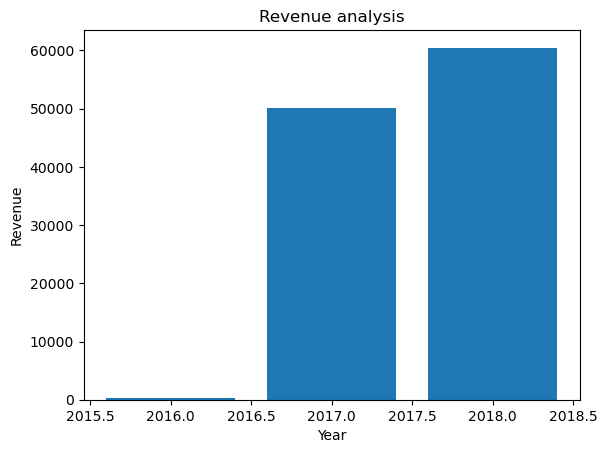

In [107]:
fig,ax=plt.subplots()
ax.bar(Revenue_sum_by_year["Year"],Revenue_sum_by_year["Revenue"])
ax.set(title="Revenue analysis",
      xlabel="Year",
      ylabel="Revenue");

##
here we see a increasing trend that's agood news for olist E-commerce platform.